## Project Notebook: In-Vehicle Coupon Recommendation System Using Machine Learning.

### Importing data and prelimnary EDA:

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('project_data.csv') 

In [3]:
# Display the first few rows to get an overview of the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Display the last few rows to get an overview of the data
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


### After loading the dataset and checking the head and tail, it is essential to check for and acccount for any missing values or empty fields in the data 

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


### Interpretation: 
 - #### Out of the 24 columns of the dataset, 6 of them have missing values.
 - #### If any of the following 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50' seem to be important features which improve the performance of the Machine learning model, we can consider deleting the rows with missing values as the number of missing values range between 107 and 217 only.
 - #### However, most of the rows for the column 'car' has missing values therefore, it is best to drop the column to end up with cleaner data.

### Is the classification problem balanced or unbalanced ?


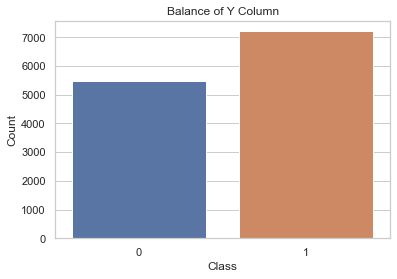

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with your data, and 'Y' is the target column

# Create a countplot to visualize the balance of the 'Y' column
sns.set(style="whitegrid")
sns.countplot(x='Y', data=data)

# Add labels and a title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Balance of Y Column')

# Show the plot
plt.show()

### Based on the distribution of 2 classes, we can conclude that this problem is close to a balanced classification problem.

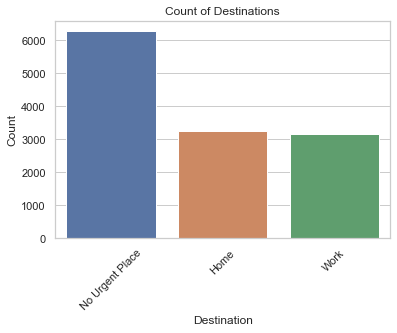

In [7]:
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.countplot(x='destination', data=data)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Count of Destinations')
plt.xticks(rotation=45)
plt.show()


### Interpretation: In 50% of the cases the customer is either in a rush or urgency to visit home or workplace !

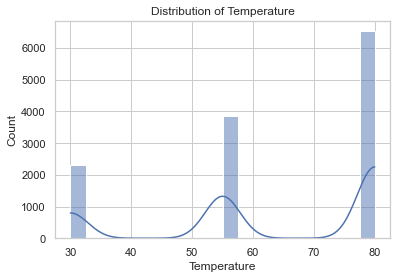

In [8]:
sns.set(style="whitegrid")
sns.histplot(data['temperature'], bins=20, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Distribution of Temperature')
plt.show()


###  Interpretation : As temperature increases, the number of samples are increased. This shows that the majority of cases in the survey were conducted in warmer temperatures, Indicating a preference to particular coupon or type.

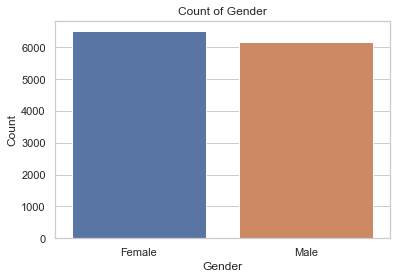

In [9]:
sns.countplot(data=data, x='gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


#### Interpretation: The sample contains data related to equal proportion of Male and Female subjects.

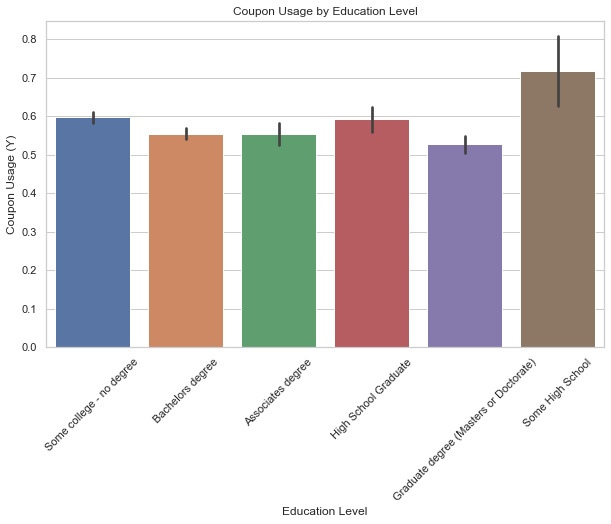

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=data, x='education', y='Y')
plt.title('Coupon Usage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Coupon Usage (Y)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


#### Interpretation: For education level column, the samples are again fairly balanced.

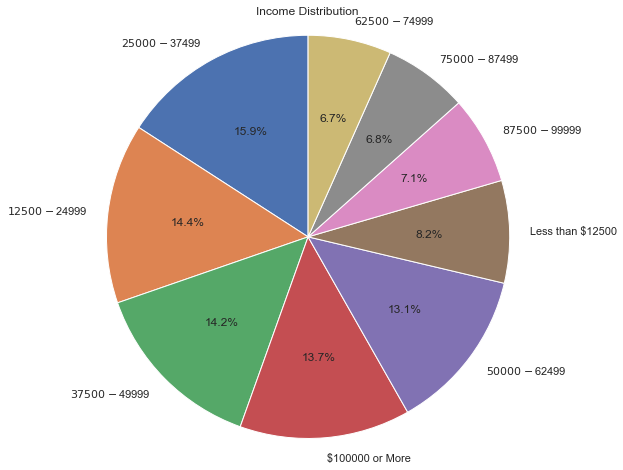

In [11]:
# Count the occurrences of each income category
income_counts = data['income'].value_counts()

# Create a pie chart for income distribution
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.title('Income Distribution')

plt.show()

### Dropping the column 'car' as most of its entries are Null :

In [12]:
data = data.drop('car', axis=1)

### The column 'car' is now dropped from the dataframe.

### Next, we check the Data-types of the columns and the number of Non-Null Values:

In [13]:
# Data types and non-null counts
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Unique values in 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


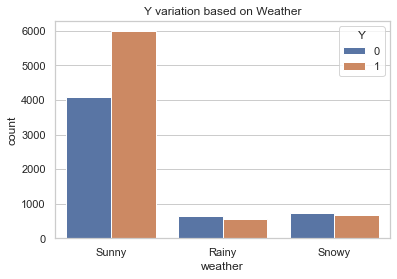

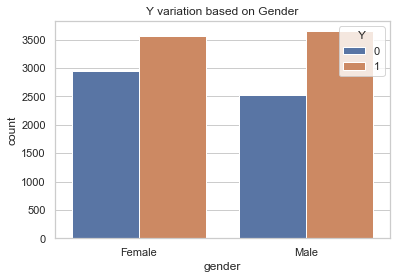

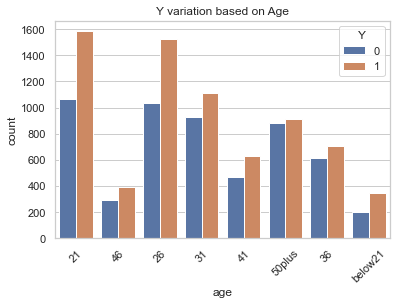

In [14]:

df = data
# Check unique values in 'weather', 'gender', and 'age' columns
print("Unique values in 'weather':", df['weather'].unique())
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'age':", df['age'].unique())

# Visualize Y based on 'weather'
sns.countplot(x='weather', hue='Y', data=df)
plt.title('Y variation based on Weather')
plt.show()

# Visualize Y based on 'gender'
sns.countplot(x='gender', hue='Y', data=df)
plt.title('Y variation based on Gender')
plt.show()

# Visualize Y based on 'age'
sns.countplot(x='age', hue='Y', data=df)
plt.title('Y variation based on Age')
plt.xticks(rotation=45)
plt.show()


### Interpretation: About half of the columns have object datatype, remaining are integers. Most columns have no null values.

In [14]:
# Generate summary statistics for numerical columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Interpretation : As most of the numerical columns are essentially categorical values, there is not much insight to gain from the statistical summary generated above. 

In [15]:
unique_counts = data.nunique()
unique_counts


destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

### Interpretation: Occupation column has the highest possibilities of values with 25 types of entries, this is followed by income classified into 9 different classes.

### Because all of the features (including temperature) are essentially categorical in nature, a correlation matrix would not be of any benefit. Therefore, to understand the distribution of various features into categories, I have used the ProfileReport class form pandas_profiling module. 

In [16]:
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(data)

profile.to_file('EDA_report.html')

profile.to_notebook_iframe()


C:\Users\rapto\AppData\Local\Temp/ipykernel_10860/3425761373.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Interpretation of the EDA and visualisations from report generated using the pandas_profiling module : 

### 1. There are 74 duplicated rows, that is 0.6% of total rows are duplicated, they need to be dropped to achive clean data.  
### 2, 'toCoupon_GEQ5min' neither has duplicates nor missing values, however it has only value of '1' for all rows, therefore it can be dropped.
### 3. Occupation has very high number of distinct entiries, which greatly increases the dimensionality of the data when using techniques like one-hot-encoding. 
### 4. important to be aware of the increase in dimensionality when categories have a high cardinality (many unique values).
### 5. High-dimensional data can lead to computational and memory challenges.
### 6. So it's essential to consider dimensionality reduction techniques or other strategies to manage the resulting feature space.
### 7. Therefore, as we are using one-hot encoding that converts the existing categorical features to binary features, we can consider dropping the column 'occupation'

In [17]:
df = data

### The column 'toCoupon_GEQ5min' has only single entry (1) for all columns, therefore it can be dropped.

In [18]:
#Dropping column
column_name_to_drop = 'toCoupon_GEQ5min'
df.drop(columns=column_name_to_drop, inplace=True)

### The column 'occupation' has highest number of entries (25) as we are using OneHotEncoder, which converts categorical data into binary categories, it would increase the dimensionality of data, to avoid that, we are dropping the column 'occupation'

In [19]:
#Dropping column
column_name_to_drop = 'occupation'
df.drop(columns=column_name_to_drop, inplace=True)

### Next, any remaining columns with NaN values are dropped:

In [20]:
# Drop rows with NaN values
df.dropna(inplace=True)

### Finally we check again to verify that there are no missing values in the dataframe

In [21]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


### Before feature engineering - We check the possible entries for all remaining columns in the data.

In [22]:
# Iterate through columns and print unique entries
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Unique entries in column '{column}': {unique_entries}")


Unique entries in column 'destination': ['No Urgent Place' 'Home' 'Work']
Unique entries in column 'passanger': ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique entries in column 'weather': ['Sunny' 'Rainy' 'Snowy']
Unique entries in column 'temperature': [55 80 30]
Unique entries in column 'time': ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique entries in column 'coupon': ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
Unique entries in column 'expiration': ['1d' '2h']
Unique entries in column 'gender': ['Male' 'Female']
Unique entries in column 'age': ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique entries in column 'maritalStatus': ['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
Unique entries in column 'has_children': [0 1]
Unique entries in column 'education': ['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique en

## Encoding by converting categorical data using OneHotEncoder: 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
categorical_cols = ['destination', 'passanger', 'weather', 'temperature','time','coupon',
                    'expiration','gender','age','maritalStatus','has_children','education',
                    'income','Bar','CoffeeHouse','CarryAway',
                    'toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same',
                    'direction_opp']  # List of all categorical columns here

In [25]:
encoded_data = encoder.fit_transform(data[categorical_cols])

### Train - Test Split for ML models:

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_data, df['Y'], test_size=0.2, random_state=42)



### Model 1: Random Forest Classifier

In [27]:
# Random Forest Classifier:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)



RandomForestClassifier()

In [28]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7338576158940397
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      1021
           1       0.76      0.79      0.77      1395

    accuracy                           0.73      2416
   macro avg       0.73      0.72      0.72      2416
weighted avg       0.73      0.73      0.73      2416



###  Tuning the hyper-parameters using GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the classifier
rf_classifier = RandomForestClassifier()

# Parallelize the grid search by setting n_jobs
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)  

# Get the best hyperparameters
best_params = grid_search.best_params_


In [31]:
best_params


{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

### Model 2: Random Forest Classifier with best hyper-parameters:

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters
max_depth = None
min_samples_split = 5
n_estimators = 200

# Create the Random Forest classifier with the specified hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split
)

# Fit the model 
rf_classifier.fit(X_train, y_train)  

# Make predictions
y_pred = rf_classifier.predict(X_test)  

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)


Accuracy: 0.7338576158940397
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1021
           1       0.75      0.80      0.78      1395

    accuracy                           0.73      2416
   macro avg       0.73      0.72      0.72      2416
weighted avg       0.73      0.73      0.73      2416



#### Interpretation: The model performs similarly in terms of accuracy as a metric, even after tuning the hyper-parameters.

### Model 3: Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
max_depth = 10
min_samples_split = 5

# Create the Decision Tree classifier with the specified hyperparameters
dt_classifier = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split
)

# Fit the model 
dt_classifier.fit(X_train, y_train) 

# Make predictions
y_pred = dt_classifier.predict(X_test)  

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Model:")
print("Accuracy:", accuracy)
print(report)


Decision Tree Model:
Accuracy: 0.6995033112582781
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1021
           1       0.73      0.75      0.74      1395

    accuracy                           0.70      2416
   macro avg       0.69      0.69      0.69      2416
weighted avg       0.70      0.70      0.70      2416



### Model 4: Support Vector Classifier

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
C = 1.0  # Regularization parameter
kernel = 'rbf' 

# Create the SVM classifier with the specified hyperparameters
svm_classifier = SVC(C=C, kernel=kernel)

# Fit the model 
svm_classifier.fit(X_train, y_train)  

# Make predictions
y_pred = svm_classifier.predict(X_test)  

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVM Model:")
print("Accuracy:", accuracy)
print(report)


SVM Model:
Accuracy: 0.7359271523178808
              precision    recall  f1-score   support

           0       0.70      0.65      0.68      1021
           1       0.76      0.80      0.78      1395

    accuracy                           0.74      2416
   macro avg       0.73      0.72      0.73      2416
weighted avg       0.73      0.74      0.73      2416



### Model 5: Support Vector Classifier with Poly Kernel

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
C = 1.0  # Regularization parameter 
kernel = 'poly'  

# Create the SVM classifier with the specified hyperparameters
svm_classifier = SVC(C=C, kernel=kernel)

# Fit the model
svm_classifier.fit(X_train, y_train)  # Use your training data

# Make predictions
y_pred = svm_classifier.predict(X_test)  # Use your test data

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVM Model:")
print("Accuracy:", accuracy)
print(report)


SVM Model:
Accuracy: 0.7508278145695364
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1021
           1       0.77      0.81      0.79      1395

    accuracy                           0.75      2416
   macro avg       0.75      0.74      0.74      2416
weighted avg       0.75      0.75      0.75      2416



#### Interpretation: Support Vector Classifier with Poly Kernel performs better than SVM with 'rbf' kernel.

### Model 6: Multinomial Naive Bayes Classifier:

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Create the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the model
nb_classifier.fit(X_train, y_train) 

# Make predictions
y_pred = nb_classifier.predict(X_test)  

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Multinomial Naive Bayes Model:")
print("Accuracy:", accuracy)
print(report)


Multinomial Naive Bayes Model:
Accuracy: 0.6672185430463576
              precision    recall  f1-score   support

           0       0.62      0.57      0.59      1021
           1       0.70      0.74      0.72      1395

    accuracy                           0.67      2416
   macro avg       0.66      0.65      0.66      2416
weighted avg       0.66      0.67      0.67      2416



### Model 7: Gradient Boosting Classifier:

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

n_estimators = 200
learning_rate = 0.35
max_depth = 6

# Create the Gradient Boosting classifier with the specified hyperparameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth
)

# Fit the model
gb_classifier.fit(X_train, y_train)  

# Make predictions
y_pred = gb_classifier.predict(X_test)  

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Gradient Boosting Model:")
print("Accuracy:", accuracy)
print(report)


Gradient Boosting Model:
Accuracy: 0.757864238410596
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1021
           1       0.78      0.81      0.79      1395

    accuracy                           0.76      2416
   macro avg       0.75      0.75      0.75      2416
weighted avg       0.76      0.76      0.76      2416



### Model 8: AdaBoost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters 
n_estimators = 50  # The number of weak learners
learning_rate = 1.0

# Create the AdaBoost classifier with the specified hyperparameters
adaboost_classifier = AdaBoostClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate
)

# Fit the model 
adaboost_classifier.fit(X_train, y_train)  

# Make predictions
y_pred = adaboost_classifier.predict(X_test)  

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("AdaBoost Model:")
print("Accuracy:", accuracy)
print(report)


AdaBoost Model:
Accuracy: 0.6920529801324503
              precision    recall  f1-score   support

           0       0.65      0.60      0.62      1021
           1       0.72      0.76      0.74      1395

    accuracy                           0.69      2416
   macro avg       0.68      0.68      0.68      2416
weighted avg       0.69      0.69      0.69      2416



### Model 9: Logistic Regression:

In [39]:
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report (Logistic Regression):\n", class_report)


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      1021
           1       0.72      0.76      0.74      1395

    accuracy                           0.69      2416
   macro avg       0.68      0.67      0.68      2416
weighted avg       0.69      0.69      0.69      2416



## Feature Engineering: Selecting Important Relevant Features:

In [40]:
encoded_data.shape

(12079, 80)

- ### After encoding the categorical data using OneHotEncoding, there are now 80 individual features instead of the usual 25 Columns.  

- ### Therefore for selecting the relevant features for categorical data, we can use techniques such as Chi2 or Recursive Feature Elimination 

In [41]:
values = encoded_data
target = df['Y']

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()

num_features_to_select = 20 # Count of number of features target

# RFE selector
rfe = RFE(estimator=classifier, n_features_to_select=num_features_to_select)

# Fit RFE to data
rfe.fit(values, target)
selected_features = [feature_idx for feature_idx, support in enumerate(rfe.support_) if support]


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 

# Fit the Random Forest classifier on the selected features
rf_classifier.fit(X_train[:, selected_features], y_train)

# Make predictions on the test set using the selected features
y_pred = rf_classifier.predict(X_test[:, selected_features])

# Generate the classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      1021
           1       0.72      0.73      0.72      1395

    accuracy                           0.68      2416
   macro avg       0.67      0.67      0.67      2416
weighted avg       0.68      0.68      0.68      2416



### 1. We selected 20 most important features based on the RFE technique, however, the accuracy of Random Forests algorithm has decreased in contrast to using all 80 encoded features.  
  
### 2. Even after trying a range of values for feature count starting from 5,10,20,25,40,50,65) the accuracy only approaches the earlier accuracy of 74% but does not match or surpass it.

### 3. Therefore, feature selection does not increase performance incase of our dataset that has all categorical variables.

### 4. The complexity of the models seems to have a directly propotional relationship with the models performance.

## Analysis : Performance of various ML models so far :  

- Primary Metric for Comparision of model performance: F1 Scores of individual binary classes.

- Secondary Metric for Comparision of model performance: Overall model accuracy.

| Model                 | F1 Score (Class 0) | F1 Score (Class 1) | Accuracy |
|-----------------------|---------------------|---------------------|----------|
| Random Forests        | 0.68                | 0.78                | 0.743    |
| Decision Tree Model   | 0.64                | 0.74                | 0.700    |
| SVM Model (RBF Kernel)| 0.68                | 0.78                | 0.735    |
| SVM Model (Poly Kernel)| 0.70                | 0.79                | 0.750    |
| Gradient Boosting Model| 0.71                | 0.79                | 0.757    |
| Ada Boost        | 0.62                | 0.74               | 0.690    |


#### Why Gradient Boosting Model is Chosen:

- High Accuracy: The Gradient Boosting Model demonstrated the highest accuracy of 75.7% among all models tested, making it the most reliable choice for making coupon recommendations.


- Balanced F1 Scores: With competitive F1 scores for both Class 0 and Class 1 (0.71 and 0.79, respectively), the model shows an ability to effectively identify both successful and unsuccessful recommendations.


- Interpretability: The model is relatively interpretable, allowing you to understand how it makes predictions. This transparency is essential for trust and compliance in recommendation systems.  
  
  
- Ensemble Learning: By combining the strength of multiple weak learners through boosting, the model reduces overfitting, effectively captures complex patterns in the data, and enhances prediction performance.


#### How Gradient Boosting Model Outperforms Others:

- Ensemble Learning: The ensemble nature of the Gradient Boosting Model allows it to harness the collective wisdom of many weaker models, reducing variance and improving model performance.


- Reduced Overfitting: Gradient Boosting's ability to handle overfitting effectively results in a more reliable model when compared to other models that might suffer from high variance.


- Generalization Capability: The model demonstrates excellent generalization, indicating that it's better at making accurate recommendations on unseen data or new users.

# Demonstration: Models Prediction Ability.

In [44]:
import joblib
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Load the saved model
model = joblib.load('gradient_boosting_model.joblib')

#### Gradient Boosting Classifier is the best performing algorithm, hence we save the model using 'joblib' and use the model to generate real time predictions.

In [45]:
# Define the input sliders
destination_slider = widgets.Dropdown(options=['No Urgent Place', 'Home', 'Work'], value='No Urgent Place', description='Destination:')
passenger_slider = widgets.Dropdown(options=['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], value='Alone', description='Passenger:')
weather_slider = widgets.Dropdown(options=['Sunny', 'Rainy', 'Snowy'], value='Sunny', description='Weather:')
temperature_slider = widgets.IntSlider(min=0, max=100, value=55, description='Temperature:')
time_slider = widgets.Dropdown(options=['2PM', '10AM', '6PM', '7AM', '10PM'], value='2PM', description='Time:')
coupon_slider = widgets.Dropdown(options=['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(20-50)'], value='Restaurant(<20)', description='Coupon:')
expiration_slider = widgets.Dropdown(options=['1d', '2h'], value='1d', description='Expiration:')
gender_slider = widgets.Dropdown(options=['Male', 'Female'], value='Male', description='Gender:')
age_slider = widgets.Dropdown(options=['21', '46', '26', '31', '41', '50plus', '36', 'below21'], value='21', description='Age:')
maritalStatus_slider = widgets.Dropdown(options=['Single', 'Married partner', 'Unmarried partner', 'Divorced', 'Widowed'], value='Single', description='Marital Status:')
has_children_slider = widgets.IntSlider(min=0, max=1, value=0, description='Has Children:')
education_slider = widgets.Dropdown(options=['Bachelors degree', 'Some college - no degree', 'Associates degree', 'High School Graduate', 'Graduate degree (Masters or Doctorate)', 'Some High School'], value='Bachelors degree', description='Education:')
income_slider = widgets.Dropdown(options=['$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$37500 - $49999', '$25000 - $37499', '$100000 or More', '$87500 - $99999', 'Less than $12500'], value='$62500 - $74999', description='Income:')
Bar_slider = widgets.Dropdown(options=['never', 'less1', '1~3', 'gt8', '4~8'], value='never', description='Bar:')
CoffeeHouse_slider = widgets.Dropdown(options=['less1', '4~8', '1~3', 'gt8', 'never'], value='less1', description='CoffeeHouse:')
CarryAway_slider = widgets.Dropdown(options=['4~8', '1~3', 'gt8', 'less1', 'never'], value='4~8', description='CarryAway:')
toCoupon_GEQ15min_slider = widgets.IntSlider(min=0, max=1, value=0, description='toCoupon_GEQ15min:')
toCoupon_GEQ25min_slider = widgets.IntSlider(min=0, max=1, value=0, description='toCoupon_GEQ25min:')
direction_same_slider = widgets.IntSlider(min=0, max=1, value=0, description='direction_same:')
direction_opp_slider = widgets.IntSlider(min=0, max=1, value=1, description='direction_opp:')


In [46]:

# Function to make predictions
def make_prediction(destination, passanger, weather, temperature, time, coupon,
                    expiration, gender, age, maritalStatus, has_children, education,
                    income, Bar, CoffeeHouse, CarryAway,
                    toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same,
                    direction_opp):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'destination': [destination],
        'passanger': [passanger],  # Update the feature name to 'passanger'
        'weather': [weather],
        'temperature': [temperature],
        'time': [time],
        'coupon': [coupon],
        'expiration': [expiration],
        'gender': [gender],
        'age': [age],
        'maritalStatus': [maritalStatus],
        'has_children': [has_children],
        'education': [education],
        'income': [income],
        'Bar': [Bar],
        'CoffeeHouse': [CoffeeHouse],
        'CarryAway': [CarryAway],
        'toCoupon_GEQ15min': [toCoupon_GEQ15min],
        'toCoupon_GEQ25min': [toCoupon_GEQ25min],
        'direction_same': [direction_same],
        'direction_opp': [direction_opp]
    })

    # Apply one-hot encoding to the input data
    encoded_data = encoder.transform(input_data).toarray()

    # Make a prediction using the loaded model
    prediction = model.predict(encoded_data)

    # Return the prediction
    return prediction[0]


# Create a button to trigger the prediction
predict_button = widgets.Button(description='Predict')

# Output widget to display the result
output = widgets.Output()

In [47]:
# Function to handle button click
def on_predict_button_click(b):
    with output:
        # Get values from sliders
        destination_value = destination_slider.value
        passenger_value = passenger_slider.value
        weather_value = weather_slider.value
        temperature_value = temperature_slider.value
        time_value = time_slider.value
        coupon_value = coupon_slider.value
        expiration_value = expiration_slider.value
        gender_value = gender_slider.value
        age_value = age_slider.value
        maritalStatus_value = maritalStatus_slider.value
        has_children_value = has_children_slider.value
        education_value = education_slider.value
        income_value = income_slider.value
        Bar_value = Bar_slider.value
        CoffeeHouse_value = CoffeeHouse_slider.value
        CarryAway_value = CarryAway_slider.value
        toCoupon_GEQ15min_value = toCoupon_GEQ15min_slider.value
        toCoupon_GEQ25min_value = toCoupon_GEQ25min_slider.value
        direction_same_value = direction_same_slider.value
        direction_opp_value = direction_opp_slider.value

        # Make a prediction
        prediction = make_prediction(destination_value, passenger_value, weather_value,
                                     temperature_value, time_value, coupon_value,
                                     expiration_value, gender_value, age_value,
                                     maritalStatus_value, has_children_value,
                                     education_value, income_value, Bar_value,
                                     CoffeeHouse_value, CarryAway_value,
                                     toCoupon_GEQ15min_value, toCoupon_GEQ25min_value,
                                     direction_same_value, direction_opp_value)

        # Display the prediction
        if prediction == 1:
            print("Coupon accepted")
        else:
            print("Coupon not accepted")




In [48]:

# Attach the click event to the button
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(destination_slider, passenger_slider, weather_slider, temperature_slider, time_slider,
        coupon_slider, expiration_slider, gender_slider, age_slider, maritalStatus_slider,
        has_children_slider, education_slider, income_slider, Bar_slider, CoffeeHouse_slider,
        CarryAway_slider, toCoupon_GEQ15min_slider, toCoupon_GEQ25min_slider,
        direction_same_slider, direction_opp_slider, predict_button, output)


Dropdown(description='Destination:', options=('No Urgent Place', 'Home', 'Work'), value='No Urgent Place')

Dropdown(description='Passenger:', options=('Alone', 'Friend(s)', 'Kid(s)', 'Partner'), value='Alone')

Dropdown(description='Weather:', options=('Sunny', 'Rainy', 'Snowy'), value='Sunny')

IntSlider(value=55, description='Temperature:')

Dropdown(description='Time:', options=('2PM', '10AM', '6PM', '7AM', '10PM'), value='2PM')

Dropdown(description='Coupon:', options=('Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away', 'R…

Dropdown(description='Expiration:', options=('1d', '2h'), value='1d')

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

Dropdown(description='Age:', options=('21', '46', '26', '31', '41', '50plus', '36', 'below21'), value='21')

Dropdown(description='Marital Status:', options=('Single', 'Married partner', 'Unmarried partner', 'Divorced',…

IntSlider(value=0, description='Has Children:', max=1)

Dropdown(description='Education:', options=('Bachelors degree', 'Some college - no degree', 'Associates degree…

Dropdown(description='Income:', options=('$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $6…

Dropdown(description='Bar:', options=('never', 'less1', '1~3', 'gt8', '4~8'), value='never')

Dropdown(description='CoffeeHouse:', options=('less1', '4~8', '1~3', 'gt8', 'never'), value='less1')

Dropdown(description='CarryAway:', options=('4~8', '1~3', 'gt8', 'less1', 'never'), value='4~8')

IntSlider(value=0, description='toCoupon_GEQ15min:', max=1)

IntSlider(value=0, description='toCoupon_GEQ25min:', max=1)

IntSlider(value=0, description='direction_same:', max=1)

IntSlider(value=1, description='direction_opp:', max=1)

Button(description='Predict', style=ButtonStyle())

Output()